# California Housing Predictions

### _Ankur Patel_
---

__Abstract:__ These are predictions for house prices in California - 1990 Census dataset - according to these features: longitude, latitude, housingMedianAge, totalRooms, totalBedrooms, population, households, medianIncome, medianHouseValue. The dataset is of 20,640 observations to analyze the dependent variable of medianHouseValue. The main objective of this project is to evaluate regression methods of Linear Regression (OLS), Ridge, Lasso, and ElasticNet using cross-validation, and to tune the parameters using GridLearnCV. This report includes visualizations, descriptions, comments, and all results.  

---

### PRE-PROCESSING

The features in this dataset:
- MedInc: median income for households within a block of houses 
- HouseAge: median age of a house
- AveRooms: number of rooms
- AveBedrms: number of bedrooms
- Population: number of people residing
- AveOccup: number of households
- Latitude: a measure of how far north a house is
- Longitude: a measure of how far west a house is
- target: median house value for households
The values are averages within a block.

First, I will import the dataset from the sklearn datasets library and describe it.

In [361]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




I restructured the dataset into a Pandas DataFrame. This dataset has numeric values in all features.

In [362]:
import pandas as pd

df = pd.DataFrame(
    data=housing.data,
    columns=housing.feature_names
    )
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


None of the columns have any NaN values.

In [363]:
df.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
target        False
dtype: bool

I got the statistics for this dataset, and it does not look pleasant. 

In [364]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


---
### VISUALIZE UNIVARIATE DEPENDECY

The histograms show the univariate distributions for each feature. None of the features are normally distributed; they are right-skewed, ragged, peaked, and with outliers. The distributions can also be viewed by other plots like density, box and whisker, multivariate plots, or scatterplots. 

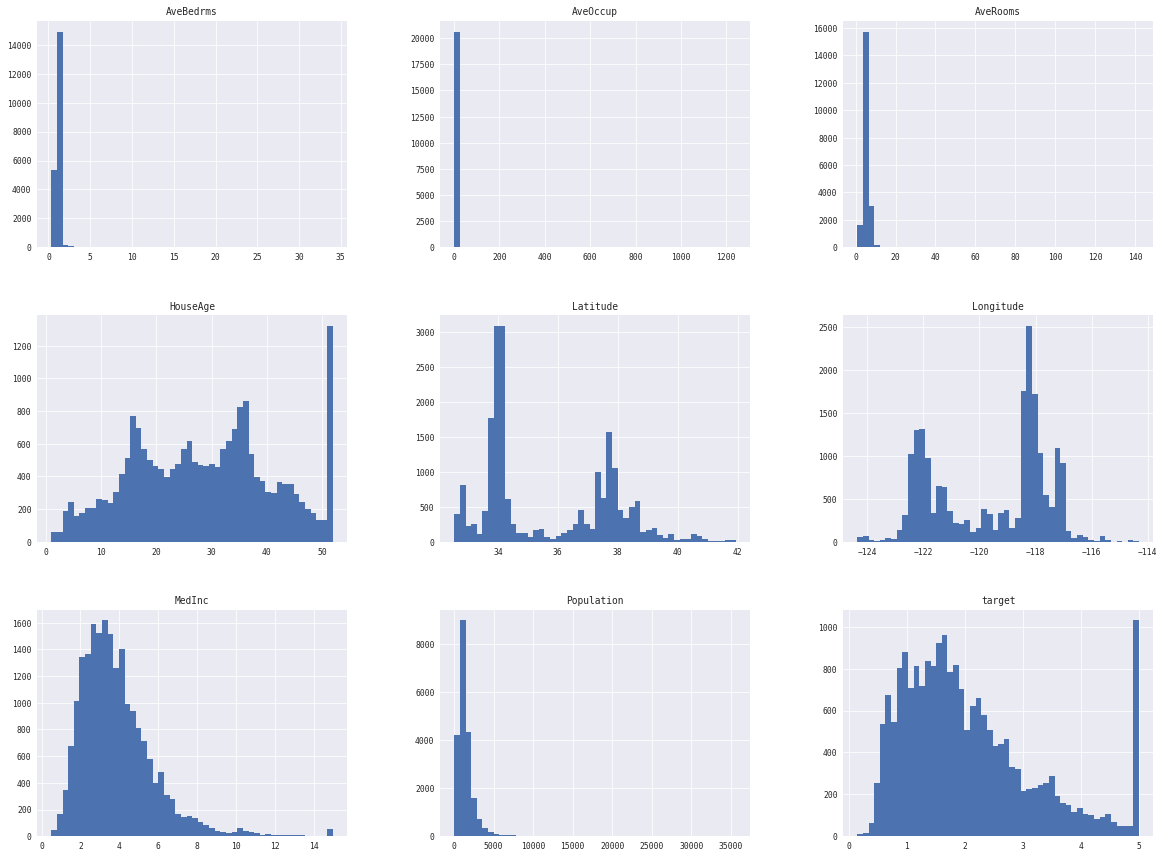

In [365]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

The histograms of HouseAge and target show an extremely high count at 50 and 500,000 respectively because they were clearly capped at those numbers. If the higher numbers were needed for predictions, you can collect from uncapped labels or the cap labels can be removed.     

I displayed scatterplots of all the features in a matrix. The last row and last column are for target, and they can be compared with the other features in this matrix. The scatterplots also nicely show the distributions and the outliers.    

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001929430AEB8>


<Figure size 432x288 with 0 Axes>

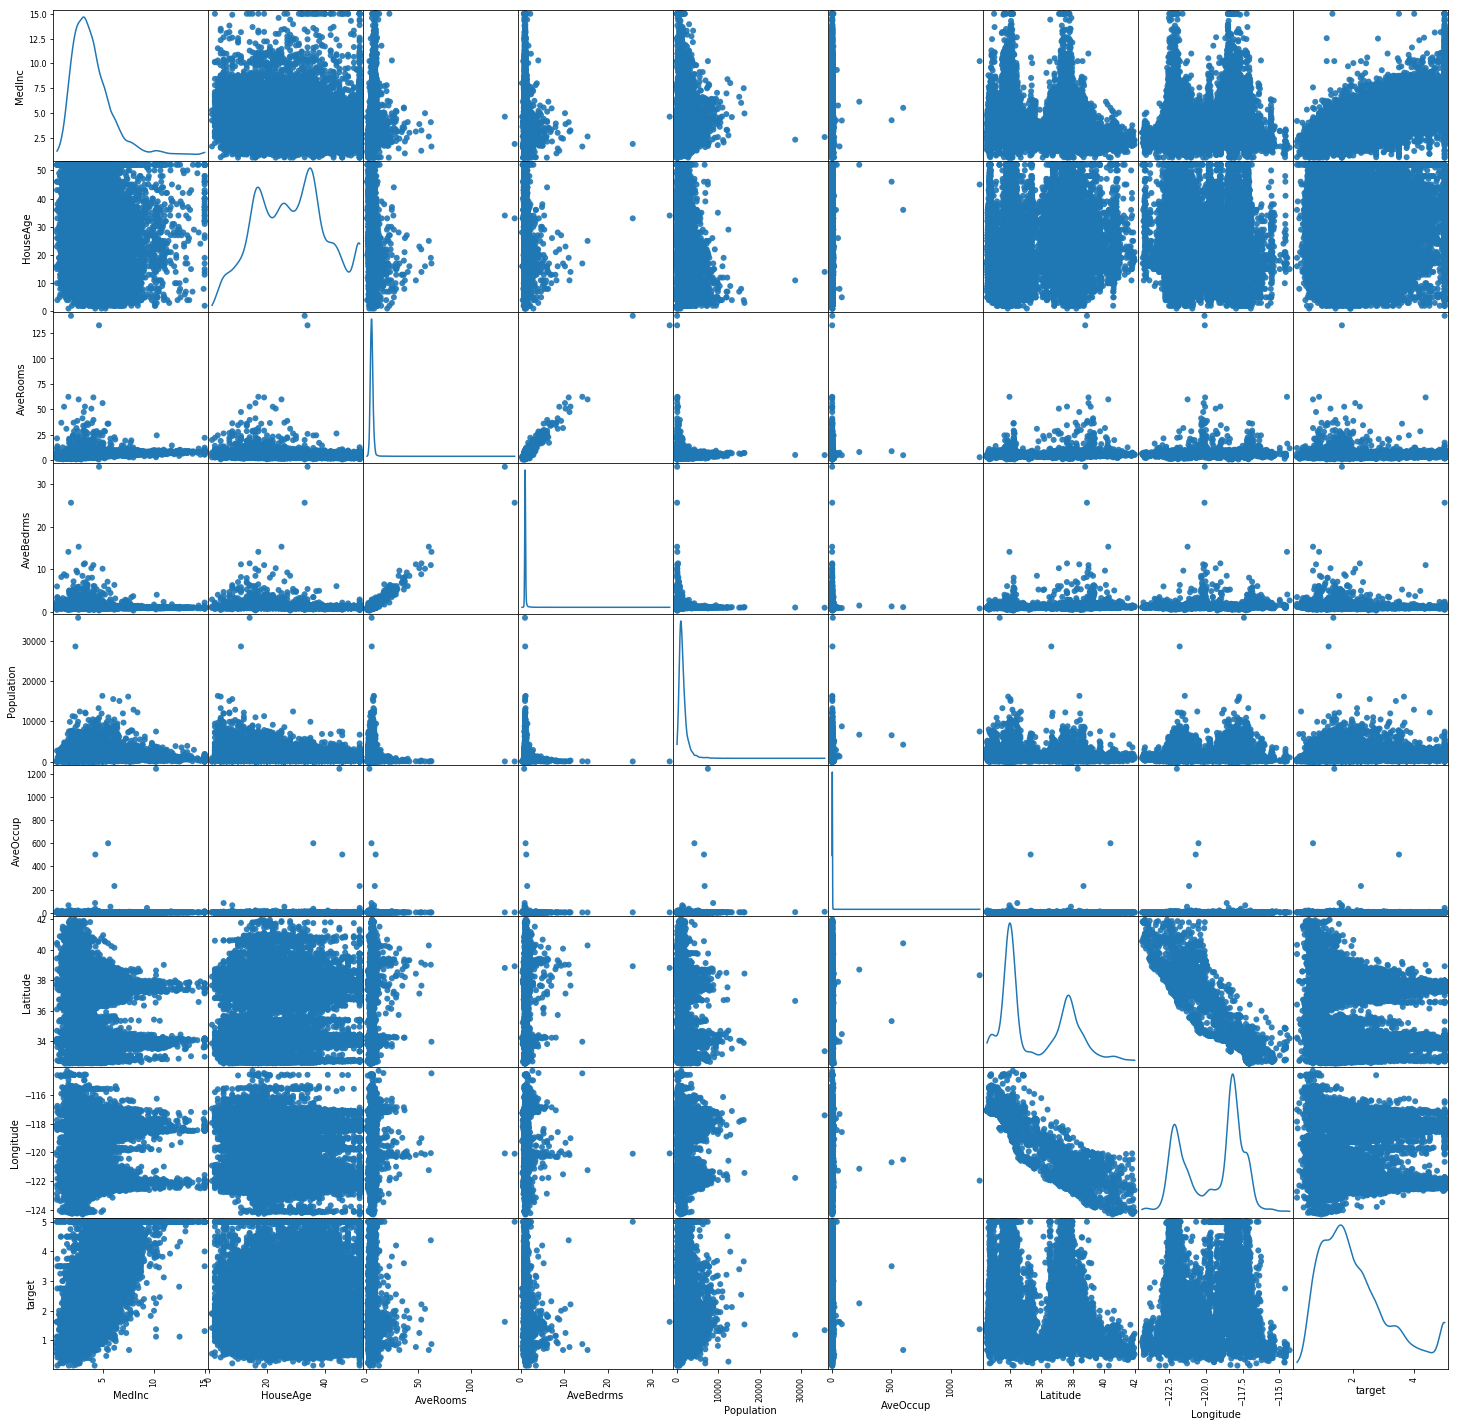

In [37]:
# scroll down and ignore the code details for the plot

fig = plt.figure()
print(scatter_matrix(df, figsize=(25,25), alpha=0.9, diagonal="kde", marker="o"))

For those who understand better with numbers, I created a matrix of the rounded coefficients and a heatmap for the color scale. I first created a boxplot and violin displays for target to better see its distribution. The boxplot shows us its statistical view of the mean, range, IQR, and outliers. The violin display shows the distribution as a whole with a curve. 

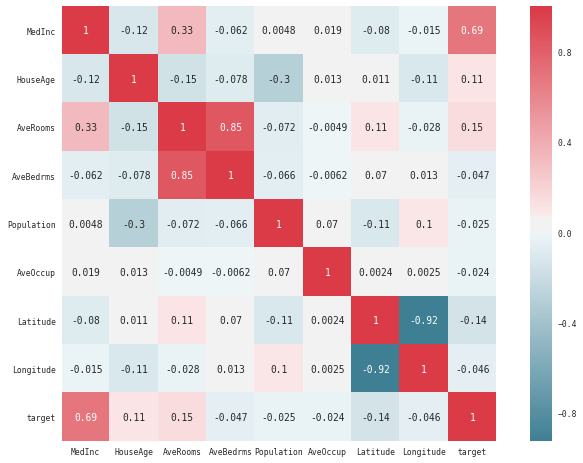

In [215]:
import seaborn as sns

sns.set(context="paper",font="monospace")
housing_corr_matrix = df.corr()
fig, axe = plt.subplots(figsize=(12,8))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True) #color palettes
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True ) #draw heatmap

Text(0.5,1,'target')

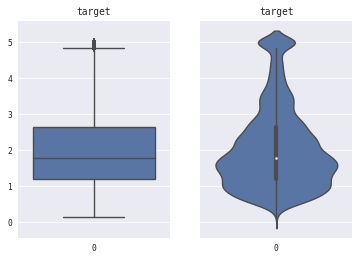

In [43]:
# boxplot displays IQR and outliers, voilin displays 
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["target"], ax=axes[0]).set_title("target")
sns.violinplot(data=df["target"], ax=axes[1]).set_title("target")

---
### VISUALIZE MULTIVARIATE DEPENDECY

I created bivariate graph of target and MedInc to get a smoothed plot of the distribution and the kernel density plot. The density plot and the curves show that the IQR must be between 0.5 and 3 house values and between 2 and 6 income values, and that the house values have a small peak at 5 and the income values is right skewed with high outliers.

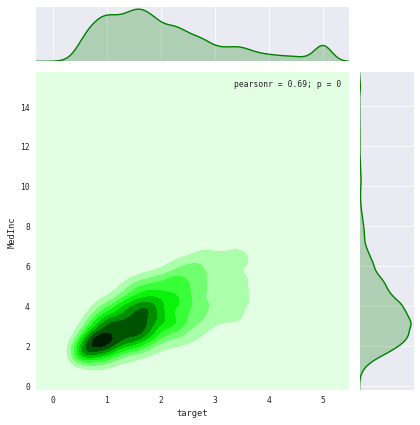

In [44]:
sns.jointplot("target", "MedInc", data=df, kind="kde", color="g");

I scatterplot the Longitude and Latitude with target and pairplot the remaining features with target. It shows us how house values behave with each feature.

Text(0,0.5,'Latitude and Longitude')

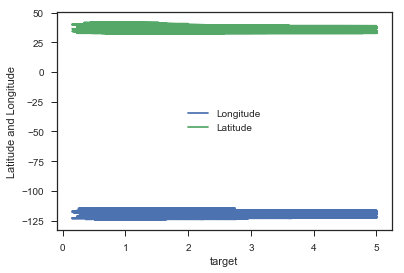

In [46]:
plt.plot(df["target"], df["Longitude"], "b-", label="Longitude")
plt.plot(df["target"], df["Latitude"], "g-", label="Latitude")
plt.legend(loc="center")
plt.xlabel("target")
plt.ylabel("Latitude and Longitude")

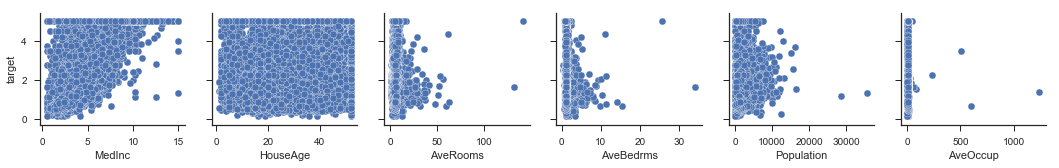

In [45]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(
    df,
    kind='scatter',
    y_vars=['target'],
    x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
)

The graph above and the histograms earlier demonstrate the need to normalize before analyzing. I will normalize and standize the dataset after the regression models to compare. I created a useful graph of geographic location and its population, filtered according to the values.  

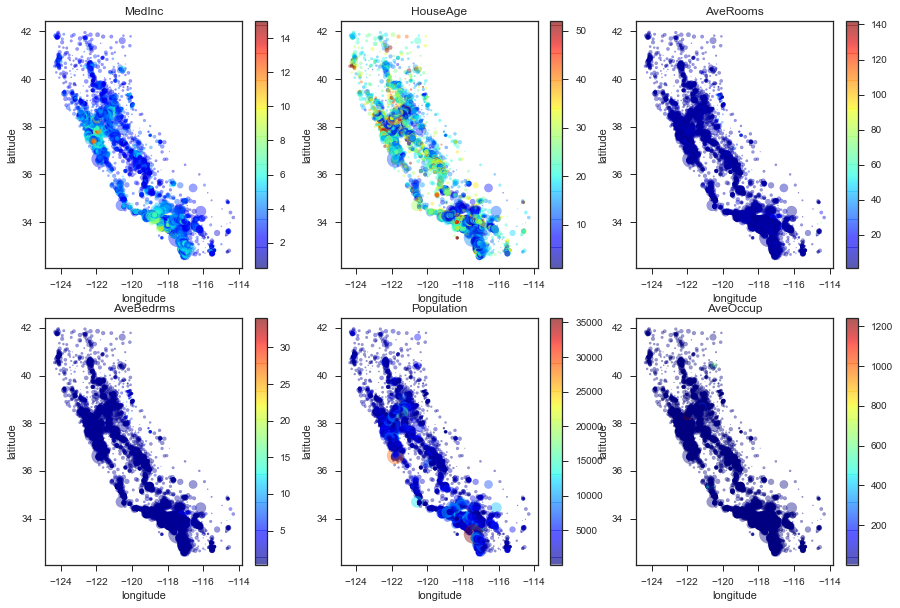

In [59]:
df_plot_geo = df.copy().drop(["target", "Longitude", "Latitude"], axis=1)

plt.figure(figsize=(15,10))
for column in df_plot_geo:
    i = df_plot_geo.columns.get_loc(column) + 1    
    plt.subplot(2, 3, i)   
    plt.scatter(
        df["Longitude"],
        df["Latitude"],
        c=df[column],
        label=column,
        s=df["Population"]/100,
        cmap=plt.get_cmap("jet"),
        # cmap='viridis',
        alpha=0.4
    )
    plt.colorbar() 
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.title(column)
fig.suptitle("Population vs Longitude-Latitude")    
plt.show()

---
### SPLIT INTO TRAIN AND TEST

I split the data into train and test sets. I used 2 split methods- a function that I defined, and a pretrained function from sklearn. I used the sklearn split function in this project. I computed my defined function with 0.8:0.2 ratio, and the default ratio sklearn split is 0.7:0.3. I will also remove Longitude, Latitude from the split function because they are not necessary. 

In [366]:
import numpy as np

def split_train_test(df, train_size):
    np.random.seed(24) #random copy
    random_data = np.random.permutation(len(df))
    train_set_size = int(len(df) * train_size)
    train_data = random_data[:train_set_size]
    test_data = random_data[train_set_size:]
    return df.iloc[train_data], df.iloc[test_data]

train_set, test_set = split_train_test(df, 0.8)
print(len(train_set), "train +", len(test_set), "test")    

16512 train + 4128 test


In [367]:
from sklearn.model_selection import train_test_split

X = df.copy().drop(["Latitude", "Longitude", "target"], axis=1)
y = df.loc[:, "target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train), "train +", len(X_test), "test")

14448 train + 6192 test


---
### REGRESSION MODELS

#### _Linear Regession (OLS)_

I compared the mean of predicted values and the actual target values of the test set. The difference was insignificant for that feature. 

In [368]:
lm = LinearRegression()
model_lm = lm.fit(X_train, y_train)
pred_train = lm.predict(X_train) 
print("Predicted target mean: ", np.mean(pred_train))
print("Test target mean: ", np.mean(y_test))

Predicted target mean:  2.068246245155039
Test target mean:  2.069285991602054


I also used the ols function to evaluate the statistics and try some models manually for detailed insights to understand some parameters’ statistical behaviors on the target. That can also factor in for creating different models, but for this project, I’m only using the different regressions models- Ridge, Lasso, ElasticNet. 

In [369]:
import statsmodels.api, statsmodels.formula.api as sm

X1 = X_train[["AveRooms", "AveBedrms"]]
ols1 = sm.OLS(y_train, X1).fit()
ols1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:01:41   Log-Likelihood:                -24212.
No. Observations:               14448   AIC:                         4.843e+04
Df Residuals:                   14446   BIC:                         4.844e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AveRooms       0.4588      0.008     56.843      0.000       0.443       0.475
AveBedrms     -0.6270      0.040    -15.634      0.000      -0.706      -0.548
==============================================================================
Omnibus:                    11211.262   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2888964.837
Skew:                          -2.759   Prob(JB):                         0.00
Kurtosis:                      72.054   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [370]:
X2 = X_train[["MedInc", "HouseAge", "AveOccup"]]
ols2 = sm.OLS(y_train, X2).fit()
ols2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 3.718e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:01:46   Log-Likelihood:                -17312.
No. Observations:               14448   AIC:                         3.463e+04
Df Residuals:                   14445   BIC:                         3.465e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4261      0.003    163.503      0.000       0.421       0.431
HouseAge       0.0157      0.000     43.511      0.000       0.015       0.016
AveOccup      -0.0064      0.001     -6.594      0.000      -0.008      -0.004
==============================================================================
Omnibus:                     2969.945   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6480.711
Skew:                           1.190   Prob(JB):                         0.00
Kurtosis:                       5.259   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
X3 = X_train[["HouseAge","AveRooms", "AveBedrms","Population","AveOccup","MedInc"]]
ols3 = sm.OLS(y_train, X3).fit()
print(ols3.params)
print(ols3.summary())

HouseAge      0.011998
AveRooms     -0.220261
AveBedrms     0.860117
Population   -0.000014
AveOccup     -0.005962
MedInc        0.525162
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.995e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:01:53   Log-Likelihood:                -16857.
No. Observations:               14448   AIC:                         3.373e+04
Df Residuals:                   14442   BIC:                         3.377e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

The model with the highest R-squared of 0.892, from the few I tried, was ols3 and it included all features in X set. I haven't included it here, but I tried it with the df with all features and got R-squared of 0.900. The F-statistic of 1.995e+04 indicates the extremely high variance.

---
#### _Linear Regression (OLS), Ridge, Lasso and ElasticNet_

To find a partial remedy for overfitting because of the noisy data, I used Ridge, Lasso, and ElasticNet to analyze the regression with cross-validation. Ridge regression shrinks the coefficients’ size; Lasso does sparse selection; and ElasticNet attempts to shrink and sparsely select simultaneously.

In [372]:
model_names = ["LinearRegression", "Ridge", "Lasso", "ElasticNet"]
models = [LinearRegression, Ridge, Lasso, ElasticNet]

I defined the regression models to evaluate the regression using cross-validation with default parameters.

In [373]:
from sklearn.metrics import mean_squared_error

for i, model in enumerate(models):
    def regresssor_model(X, y, estimator):
        regressor = estimator()
        regressor.fit(X, y)
        lr_rmse = np.sqrt(mean_squared_error(y, regressor.predict(X)))
        cv_regressor = cross_val_score(cv=10, X=X, y=y, estimator=regressor, scoring='r2')
        print("The cross validated accuracy of {} - ".format(model_names[i]) + str(100*cv_regressor.mean()))
        print("The corss validated variance of {} - ".format(model_names[i]) + str(100*cv_regressor.std()))
        return regressor

def evaluate(y_test, regressor):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print("root mean squared error for test data is %1.2f " % np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.xlabel("(y_test) - (y_pred)")
    plt.ylabel("frequency")
    plt.title("residual plot")
    plt.hist(y_test - y_pred)
    plt.subplot(1,2,2)
    plt.bar(np.arange(len(regressor.coef_)), regressor.coef_, color='red')
    plt.xlabel('coefficients')
    plt.ylabel('coefficients value')
    plt.title('coeff graph')
    plt.show()
    
def residual(y_test, regressor):
    regressor.fit(X_train, y_train)
    ypred = regressor.predict(X_test)
    print("root mean squared error for test data is %1.2f " % np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.xlabel("(y_test) - (y_pred)")
    plt.ylabel("frequency")
    plt.title("residual plot")
    plt.hist(y_test - y_pred)
    plt.show()
    
def coef(regressor):
    plt.bar(np.arange(len(regressor.coef_)), regressor.coef_, color='red')
    plt.xlabel("coefficients")
    plt.ylabel("coefficients value")
    plt.title("coeff graph")
    plt.show

I evaluated the cross-validation for each regression

The cross validated accuracy of LinearRegression - 54.54819507095115
The corss validated variance of LinearRegression - 2.6007020262153335
-----
The cross validated accuracy of Ridge - 54.550642877313834
The corss validated variance of Ridge - 2.5977215715579813
-----
The cross validated accuracy of Lasso - 28.914083814012248
The corss validated variance of Lasso - 0.9588882892686903
-----
The cross validated accuracy of ElasticNet - 42.80661969985382
The corss validated variance of ElasticNet - 1.7008157518786517
-----


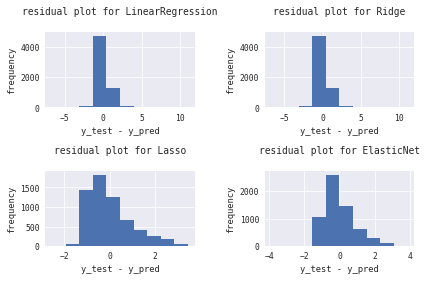

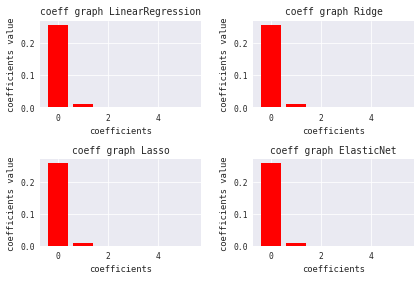

In [374]:
plt.figure()
for i, model in enumerate(models):
    l = regresssor_model(X_train.values, y_train.values, model)
    l.fit(X_train, y_train)
    y_pred = l.predict(X_test)
    print("-----")
    
    plt.subplot(2, 2, i + 1)
    plt.xlabel("y_test - y_pred")
    plt.ylabel("frequency")
    plt.title("residual plot for {}\n".format(model_names[i]))
    plt.hist(y_test - y_pred)
plt.tight_layout()
plt.show()

plt.figure()
for i, model in enumerate(models):
    plt.subplot(2, 2, i + 1)
    plt.bar(np.arange(len(l.coef_)), l.coef_, color='red')
    plt.xlabel("coefficients")
    plt.ylabel("coefficients value")
    plt.title("coeff graph {}".format(model_names[i]))
plt.tight_layout()
plt.show()

---
### NORMALIZE / SCALE / TRANSFORM

I normalized the data for the odd behaviors as well as massive outliers. I could’ve used normalize=True in the regression function, but I can see the difference this way and compare after.

In [375]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [376]:
X_train[1:5]

array([[0.12141212, 0.82352941, 0.02145483, 0.02522082, 0.02334707,
        0.00378662],
       [0.39993241, 0.31372549, 0.04276702, 0.02236894, 0.03879032,
        0.00510955],
       [0.08413677, 0.31372549, 0.01269559, 0.02557312, 0.0854284 ,
        0.00384163],
       [0.11866733, 0.96078431, 0.02867857, 0.02455563, 0.0169007 ,
        0.0048062 ]])

The cross validated accuracy of LinearRegression - 54.54819507095118
The corss validated variance of LinearRegression - 2.600702026215319
-----
The cross validated accuracy of Ridge - 52.9239136669101
The corss validated variance of Ridge - 2.5595885700294687
-----
The cross validated accuracy of Lasso - -0.06871957296246123
The corss validated variance of Lasso - 0.06951793867573253
-----
The cross validated accuracy of ElasticNet - -0.06871957296246123
The corss validated variance of ElasticNet - 0.06951793867573253
-----


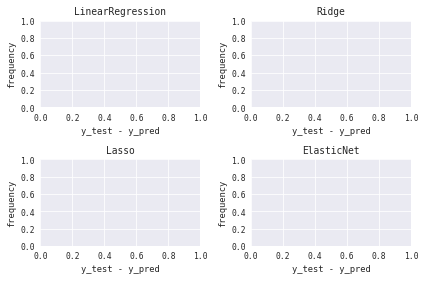

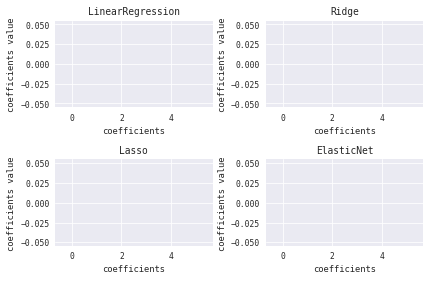

In [377]:
plt.figure()
for i, model in enumerate(models):
    l=regresssor_model(X_train, y_train, model)
    l.fit(X_train, y_train)
    y_pred = l.predict(X_test)
    print('-----')
    
    plt.subplot(2, 2, i+1)
    plt.xlabel("y_test - y_pred")
    plt.ylabel("frequency")
    plt.title("{}".format(model_names[i]))
plt.tight_layout()
plt.show


plt.figure()
for i, model in enumerate(models):
    plt.subplot(2, 2, i+1)
    plt.bar(np.arange(len(l.coef_)), l.coef_, color='red')
    plt.xlabel("coefficients")
    plt.ylabel("coefficients value")
    plt.title("{}".format(model_names[i]))
plt.tight_layout()
plt.show()

---
### TUNE USING GRIDSEARCHCV

The models’ parameters were tuned using GridSearchCV. I used GridSearchCV for Ridge, Lasso, and ElasticNet regressions with range of alpha values and cross validating 5 folds. It optimized the models by cross-validation grid-search over a parameter grid. I structured it such that it can add more regression methods and run the segments more efficiently. 

In [378]:
param_grid_lg = {
    'fit_intercept': [True, False]
}

param_grid_ridge = {
    'alpha': np.logspace(0, 2, 13, 20),
    'max_iter': [1, 10, 100, 500, 1000, 2000],
    'tol': [0.001, 0.0001],
}

param_grid_lasso = {
    'alpha': np.logspace(0, 2, 13, 20),
    'max_iter': [1, 10, 100, 500, 1000, 2000],
    'tol': [0.001, 0.0001],
}

param_grid_enet = {
    'alpha': np.logspace(0, 2, 13, 20),
    'max_iter': [1, 10, 100, 500, 1000, 2000],
    'tol': [0.001, 0.0001],
    'l1_ratio': [10, 1, 0.1, 0.01, 0.001],
    # 'fit_intercept': [True, False],
    # 'precompute': [True, False],
    # 'positive': [True, False],
}

param_list = []
param_list.append(param_grid_lg)
param_list.append(param_grid_ridge)
param_list.append(param_grid_lasso)
param_list.append(param_grid_enet)

RUNNING FOR LinearRegression
Best cross-validation score: 0.55
Best parameters:  {'fit_intercept': False}
RUNNING FOR Ridge
Best cross-validation score: 0.53
Best parameters:  {'alpha': 1.0, 'max_iter': 1, 'tol': 0.001}
RUNNING FOR Lasso
Best cross-validation score: -0.00
Best parameters:  {'alpha': 1.0, 'max_iter': 1, 'tol': 0.001}
RUNNING FOR ElasticNet
Best cross-validation score: 0.02
Best parameters:  {'alpha': 1.0, 'l1_ratio': 0.001, 'max_iter': 10, 'tol': 0.0001}


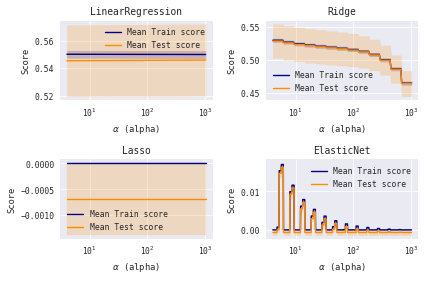

In [357]:
models_tuned = []

plt.figure()
for i, model in enumerate(models):
    print("RUNNING FOR {}".format(model_names[i]))
    l = model()
    gc = GridSearchCV(l, param_list[i], cv=10, scoring='r2', n_jobs=-1)
    gc.fit(X_train, y_train)

    print("Best cross-validation score: {:.2f}".format(gc.best_score_))
    print("Best parameters: ", gc.best_params_)
    gc.best_estimator_
    models_tuned.append(gc.best_estimator_)
    
    train_scores_mean = gc.cv_results_["mean_train_score"]
    train_scores_std = gc.cv_results_["std_train_score"]
    test_scores_mean = gc.cv_results_["mean_test_score"]
    test_scores_std = gc.cv_results_["std_test_score"]

    alphas = np.logspace(2, 10, num=len(train_scores_mean), base=2)

    plt.subplot(2, 2, i + 1)
    plt.title(model_names[i])
    plt.xlabel("$\\alpha$ (alpha)")
    plt.ylabel("Score")
    # plot train scores
    plt.semilogx(alphas, train_scores_mean, label="Mean Train score", color="navy")

    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between(alphas, train_scores_mean - train_scores_std,
                           train_scores_mean + train_scores_std, alpha=0.2, color="navy")
    plt.semilogx(alphas, test_scores_mean, label="Mean Test score", color="darkorange")

    # shaded graph of MSE
    plt.gca().fill_between(alphas, test_scores_mean - test_scores_std,
                           test_scores_mean + test_scores_std, alpha=0.2, color="darkorange")
    plt.legend(loc="best")
plt.tight_layout()
plt.show()

<class 'sklearn.linear_model.base.LinearRegression'>
The cross validated accuracy - 54.59846066556899
The corss validated variance is - 2.620680897797876
<class 'sklearn.linear_model.ridge.Ridge'>
The cross validated accuracy - 52.9239136669101
The corss validated variance is - 2.5595885700294687
<class 'sklearn.linear_model.coordinate_descent.Lasso'>
The cross validated accuracy - -0.06871957296246123
The corss validated variance is - 0.06951793867573253
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'>
The cross validated accuracy - 1.634057740474405
The corss validated variance is - 0.10850768746471554


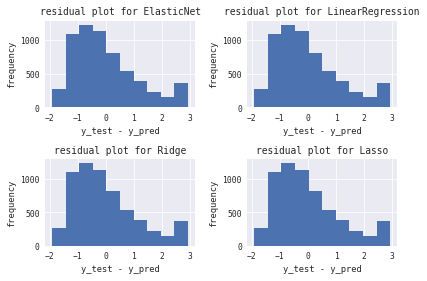

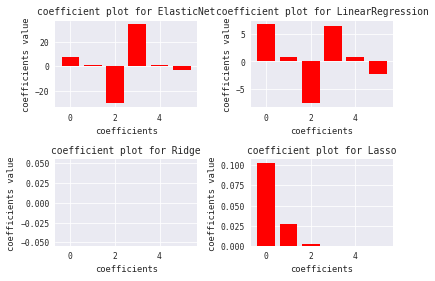

In [385]:
plt.figure()
for i, model in enumerate(models_tuned):
    print(type(model))
    
    regressor = model
    X, y = X_train, y_train
    regressor.fit(X,y)
    lr_rmse=np.sqrt(mean_squared_error(y, regressor.predict(X)))
    cv_regressor=cross_val_score(cv=10, X=X, y=y, estimator=regressor, scoring='r2')
    print("The cross validated accuracy - " + str(100*cv_regressor.mean()))
    print("The corss validated variance is - " + str(100*cv_regressor.std()))
    
    plt.subplot(2, 2, i + 1)
    plt.xlabel("y_test - y_pred")
    plt.ylabel("frequency")
    plt.title("residual plot for {}".format(model_names[i - 1]))
    plt.hist(y_test - y_pred)
    plt.tight_layout()
    
f = plt.figure()
for i, model in enumerate(models_tuned):
    l = model
    plt.subplot(2, 2, i + 1)
    plt.bar(np.arange(len(l.coef_)), l.coef_,color="red")
    plt.xlabel("coefficients")
    plt.ylabel("coefficients value")
    plt.title("coefficient plot for {}".format(model_names[i - 1]))
plt.tight_layout()    
f.show()

---
### CONCLUSION

The best results for this dataset were got after GridSearchCV with the cross-validation method of the regressions. The residual plots were used to compare and they look much better distributed after GridSearchCV. Normalizing and Scaling was necessary to get results from this dataset. Since this project was only to run the Machine learning techniques and compare, getting higher accuracy was not likely with this dataset. 